# Read the data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import langdetect
from collections import Counter
import tqdm
import nltk; nltk.download('brown'); nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\nadia\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nadia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
jobs_ds = pd.read_csv('ds_jobs.csv', encoding='utf-8')
jobs_da = pd.read_csv('da_jobs.csv', encoding='utf-8')
jobs_dp = pd.read_csv('dp_jobs.csv', encoding='utf-8')
all_jobs = pd.concat([jobs_ds,jobs_da,jobs_dp])
all_jobs.shape

(1374, 7)

# Clean the data

In [4]:
# Need pandas
def clean_jobs(df):
    df = df.drop_duplicates()
    df = df[df['company']!="None"] # These are web job ads
    df.reset_index(inplace=True, drop=True)
    
    # Clean cantons (cut-off 4 occurences)
    df['location']= df['location'].apply(lambda x: re.sub(',.*','', x)) #remove strings that come after a comma
    df['location']= df['location'].apply(lambda x: re.sub("[\d]",'', x)) #remove numbers from a string
    df['location']= df['location'].apply(lambda x: re.sub(r" ?\([^)]+\)", "", x)) #remove the paranthesis area
    df['location']= df['location'].apply(lambda x: re.sub('Zur', 'Zür', x))
    df['location']= df['location'].apply(lambda x: re.sub('Genè', 'Gene', x))
    df['location']= df['location'].apply(lambda x: re.sub('Geneve', 'Geneva', x))
    df['location']= df['location'].apply(lambda x: re.sub(' Headquarter', '', x))
    df['location']= df['location'].apply(lambda x: re.sub('Region ', '', x))
    
    return df

In [5]:
jobs_ds_clean = clean_jobs(jobs_ds)
jobs_da_clean = clean_jobs(jobs_da)
jobs_dp_clean = clean_jobs(jobs_dp)
all_jobs_clean = clean_jobs(all_jobs)
all_jobs_clean.shape

(664, 7)

In [6]:
def add_language(df):
    df['language'] = df['description'].apply(lambda x: langdetect.detect(x))
    return df

In [7]:
jobs_ds_clean = add_language(jobs_ds_clean)
jobs_da_clean = add_language(jobs_da_clean)
jobs_dp_clean = add_language(jobs_dp_clean)
all_jobs_clean = add_language(all_jobs_clean)

In [8]:
all_jobs_clean.shape

(664, 8)

In [9]:
all_jobs_clean.head(3)

,date,title,company,location,description,link,original_link,language
0,"Monday, March 11, 2019",Datenspezialist Beschaffungscontrolling Bund/D...,BBL,Bern,Das Bundesamt für Bauten und Logistik BBL such...,https://www.jobs.ch/en/vacancies/detail/879005...,https://direktlink.prospective.ch/?view=20d108...,de
1,"Wednesday, March 13, 2019",Senior Research Scientist in Medical Imaging,CAScination AG,Bern,CAScination AG is a fast-growing and award-wi...,https://www.jobs.ch/en/vacancies/detail/879796...,None,en
2,"Thursday, March 7, 2019",Senior Data Scientist / Analytics Translator,Axpo Solutions AG,Baden,Apply best-practice data science to implement...,https://www.jobs.ch/en/vacancies/detail/878342...,https://direktlink.prospective.ch/?view=3a6cf7...,en


# Run analytics
## Figure 1: Jobs per location

In [10]:
def count_per(df, per):
    df = df.groupby(per).size().reset_index(name=f'count_per_{per}')
    df = df.sort_values(by=f'count_per_{per}', ascending = False)
    df.reset_index(inplace=True, drop=True)
    return df

In [11]:
count_per_loc_all = count_per(all_jobs_clean, 'location')
count_per_loc_ds = count_per(jobs_ds_clean, 'location')
count_per_loc_da = count_per(jobs_da_clean, 'location')
count_per_loc_dp = count_per(jobs_dp_clean, 'location')

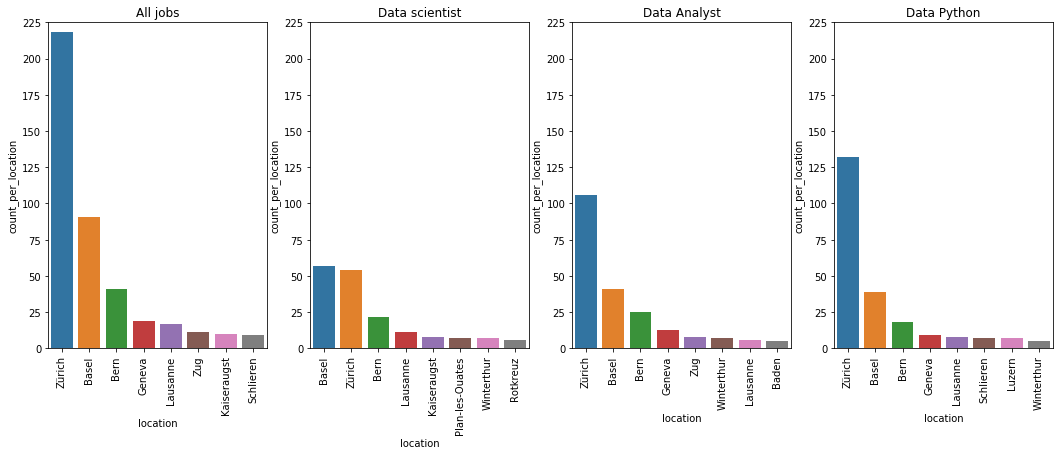

In [12]:
fig = plt.figure(figsize=(18, 6))
fig.suptitle('', fontsize=30)

ax0 = fig.add_subplot(1,4,1)
ax0 = sns.barplot(x=count_per_loc_all['location'].head(8), y=count_per_loc_all['count_per_location'].head(8))
ax0.set_title("All jobs")
ax0 = plt.xticks(rotation=90)
ax0 = plt.ylim(0, 225)

ax1 = fig.add_subplot(1,4,2)
ax1 = sns.barplot(x=count_per_loc_ds['location'].head(8), y=count_per_loc_ds['count_per_location'].head(8))
ax1.set_title("Data scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.ylim(0, 225)

ax2 = fig.add_subplot(1,4,3)
ax2 = sns.barplot(x=count_per_loc_da['location'].head(8), y=count_per_loc_da['count_per_location'].head(8))
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.ylim(0, 225)

ax3 = fig.add_subplot(1,4,4)
ax3 = sns.barplot(x=count_per_loc_dp['location'].head(8), y=count_per_loc_dp['count_per_location'].head(8))
ax3.set_title("Data Python")
ax3 = plt.xticks(rotation=90)
ax3 = plt.ylim(0, 225)

## Figure 2: Jobs per employer

In [13]:
count_per_comp_all = count_per(all_jobs_clean, 'company')
count_per_comp_ds = count_per(jobs_ds_clean, 'company')
count_per_comp_da = count_per(jobs_da_clean, 'company')
count_per_comp_dp = count_per(jobs_dp_clean, 'company')
count_per_comp_all.head()

,company,count_per_company
0,F. Hoffmann-La Roche AG,56
1,Credit Suisse AG,34
2,ETH Zürich,21
3,Swisscom (Schweiz) AG,16
4,Novartis AG,12


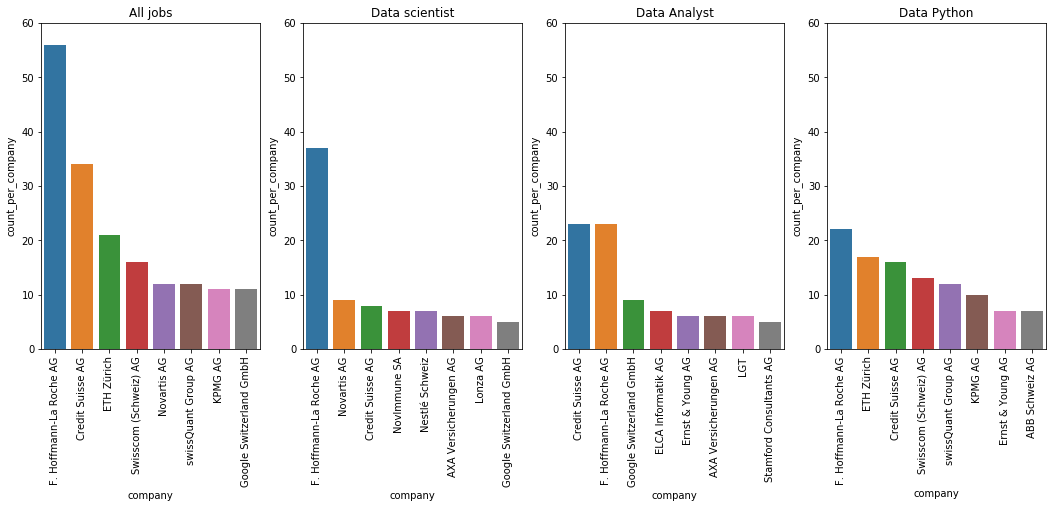

In [14]:
fig = plt.figure(figsize=(18, 6))
fig.suptitle('', fontsize=30)

ax0 = fig.add_subplot(1,4,1)
ax0 = sns.barplot(x=count_per_comp_all['company'].head(8), y=count_per_comp_all['count_per_company'].head(8))
ax0.set_title("All jobs")
ax0 = plt.xticks(rotation=90)
ax0 = plt.ylim(0, 60)

ax1 = fig.add_subplot(1,4,2)
ax1 = sns.barplot(x=count_per_comp_ds['company'].head(8), y=count_per_comp_ds['count_per_company'].head(8))
ax1.set_title("Data scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.ylim(0, 60)

ax2 = fig.add_subplot(1,4,3)
ax2 = sns.barplot(x=count_per_comp_da['company'].head(8), y=count_per_comp_da['count_per_company'].head(8))
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.ylim(0, 60)

ax3 = fig.add_subplot(1,4,4)
ax3 = sns.barplot(x=count_per_comp_dp['company'].head(8), y=count_per_comp_dp['count_per_company'].head(8))
ax3.set_title("Data Python")
ax3 = plt.xticks(rotation=90)
ax3 = plt.ylim(0, 60)

## Figures 3-4-5: Word clouds
### Useful functions

In [15]:
def create_blob_string(list_string):
    blob_string = ' '
    
    for string in list_string:
        blob_string = blob_string + string + ' '

    return blob_string

In [16]:
def filter_nouns(list_string):
    blob_string = create_blob_string(list_string)
    blob = TextBlob(blob_string)
    
    nouns = []
    for noun in blob.noun_phrases:
        nouns.append(noun)
    
    return nouns    

In [17]:
def create_cloud(list_string):
    
    stopwords = set(STOPWORDS)

    blob_string = create_blob_string(list_string)
                
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(blob_string) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

### Extract nouns

In [18]:
nouns_ds = filter_nouns(jobs_ds_clean[jobs_ds_clean['language']=="en"]['description'])

In [19]:
nouns_da = filter_nouns(jobs_da_clean[jobs_da_clean['language']=="en"]['description'])

In [20]:
nouns_dp = filter_nouns(jobs_dp_clean[jobs_dp_clean['language']=="en"]['description'])

### Create wordclouds

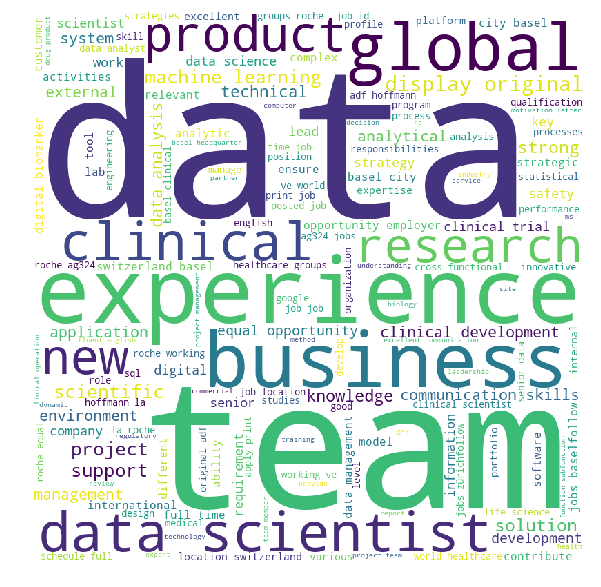

In [21]:
create_cloud(nouns_ds)

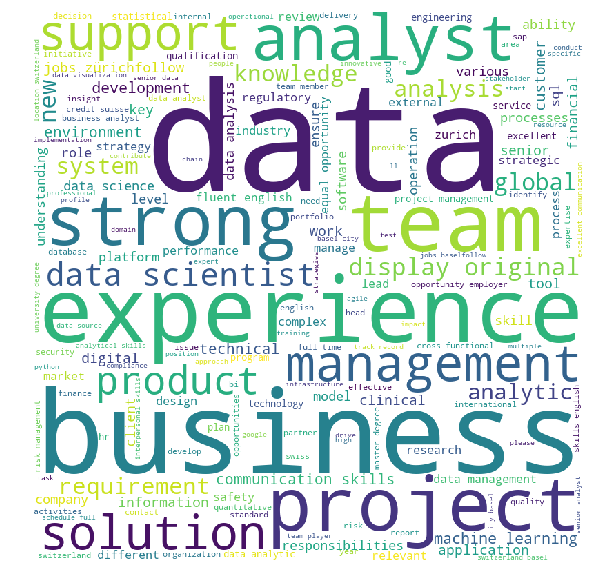

In [22]:
create_cloud(nouns_da)

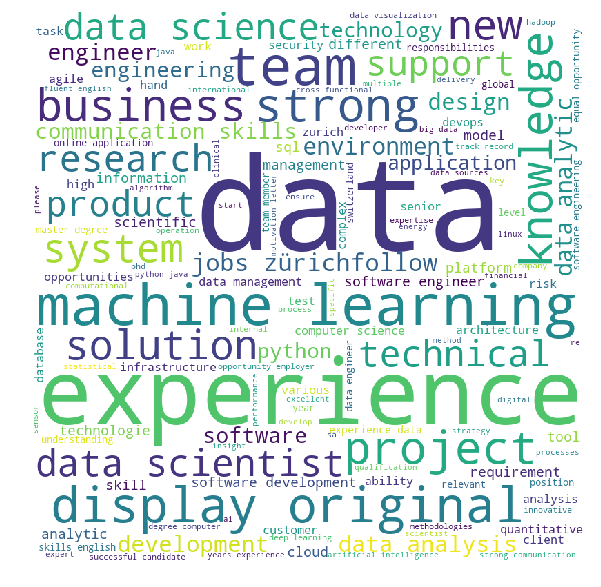

In [23]:
create_cloud(nouns_dp)

### Further analytics on nouns

In [24]:
def counter_nouns(list_words, label):
    counter = Counter(list_words)
    counts = pd.Series(counter)
    counts = counts.sort_values(ascending = False).reset_index(drop=False)
    counts.columns = ['expression', label]
    return counts

In [25]:
counts_ds = counter_nouns(nouns_ds, 'frequency_ds')
counts_da = counter_nouns(nouns_da, 'frequency_da')
counts_dp = counter_nouns(nouns_dp, 'frequency_dp')
counts_ds.head()

,expression,frequency_ds
0,roche,176
1,experience,141
2,jobs —,133
3,english,124
4,job,112


In [26]:
merged_freq = pd.merge(counts_ds,counts_da, how='outer')
merged_freq = pd.merge(merged_freq,counts_dp, how='outer')
merged_freq.head()

,expression,frequency_ds,frequency_da,frequency_dp
0,roche,176.0,98.0,103.0
1,experience,141.0,159.0,240.0
2,jobs —,133.0,182.0,204.0
3,english,124.0,163.0,153.0
4,job,112.0,79.0,77.0


In [27]:
merged_freq['ds_vs_da'] = merged_freq['frequency_ds'] - merged_freq['frequency_da']
merged_freq['ds_vs_dp'] = merged_freq['frequency_ds'] - merged_freq['frequency_dp']
merged_freq['da_vs_dp'] = merged_freq['frequency_da'] - merged_freq['frequency_dp']
merged_freq.head()

,expression,frequency_ds,frequency_da,frequency_dp,ds_vs_da,ds_vs_dp,da_vs_dp
0,roche,176.0,98.0,103.0,78.0,73.0,-5.0
1,experience,141.0,159.0,240.0,-18.0,-99.0,-81.0
2,jobs —,133.0,182.0,204.0,-49.0,-71.0,-22.0
3,english,124.0,163.0,153.0,-39.0,-29.0,10.0
4,job,112.0,79.0,77.0,33.0,35.0,2.0


## Figure 6: Language of jop posts

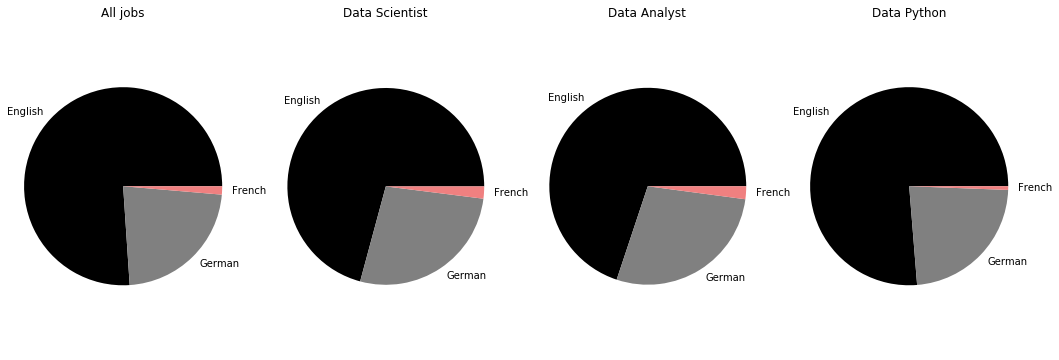

In [28]:
lang_all = all_jobs_clean['language'].value_counts()
lang_ds = jobs_ds_clean['language'].value_counts()
lang_da = jobs_da_clean['language'].value_counts()
lang_dp = jobs_dp_clean['language'].value_counts()

fig = plt.figure(figsize=(18, 6))
fig.suptitle('', fontsize=30)

labels = ['English', 'German', 'French']
colors = ['black', 'grey', 'lightcoral']

ax0 = fig.add_subplot(1,4,1)
ax0.set_title("All jobs")
ax0 = patches, texts = plt.pie(lang_all, colors=colors, labels=labels)
ax0 = plt.axis('equal')

ax1 = fig.add_subplot(1,4,2)
ax1.set_title("Data Scientist")
ax1 = patches, texts = plt.pie(lang_ds, colors=colors, labels=labels)
ax1 = plt.axis('equal')

ax2 = fig.add_subplot(1,4,3)
ax2.set_title("Data Analyst")
ax2 = patches, texts = plt.pie(lang_da, colors=colors, labels=labels)
ax2 = plt.axis('equal')

ax3 = fig.add_subplot(1,4,4)
ax3.set_title("Data Python")
ax3 = patches, texts = plt.pie(lang_dp, colors=colors, labels=labels)
ax3 = plt.axis('equal')

## Figure 7: Language skills

In [29]:
def count_skill(df, skill):
    skill_bool = df['description'].str.contains(r'\b' + skill + r'\b(?!-|&)', flags=re.IGNORECASE)
    skill_count = sum(skill_bool)*1.0
    skill_perc = skill_count/len(df['description'])
    return skill_perc

# Returns a sorted list of (skill, skill count) tuples.
def skill_count_list(df, skills):
    dic_skills = []

    for skill in skills:
        skill_perc = count_skill(df, skill)
        dic_skills.append((skill, skill_perc))
            
    # Sort the list based on the second element of the tuples.
    return sorted(dic_skills, key=lambda x: x[1], reverse=True)

In [30]:
lang_skills = ['english', 'french', 'german', 'spanish', 'anglais','français','allemand', 'deutsch','englisch','französisch']

all_job_lang_skills = skill_count_list(all_jobs_clean, lang_skills)
ds_job_lang_skills = skill_count_list(jobs_ds_clean, lang_skills)
da_job_lang_skills = skill_count_list(jobs_da_clean, lang_skills)
dp_job_lang_skills = skill_count_list(jobs_dp_clean, lang_skills)

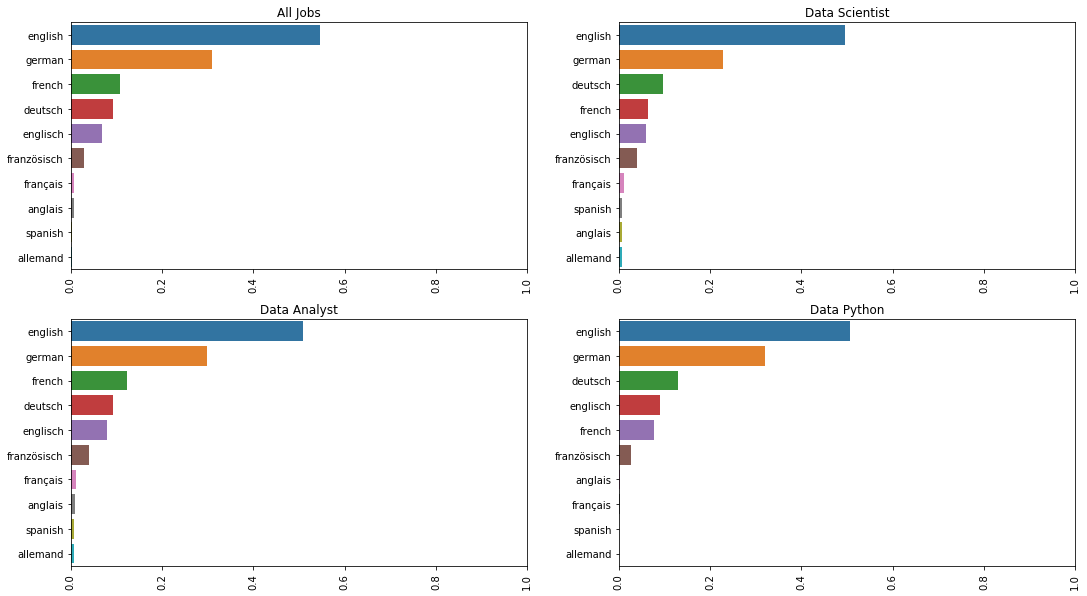

In [31]:
fig = plt.figure(figsize=(18, 10))
fig.suptitle('', fontsize=30)

ax0 = fig.add_subplot(2,2,1)
ax0 = sns.barplot(x=[t[1] for t in all_job_lang_skills],y=[t[0] for t in all_job_lang_skills])
ax0.set_title("All Jobs")
ax0 = plt.xticks(rotation=90)
ax0 = plt.xlim(0, 1)

ax1 = fig.add_subplot(2,2,2)
ax1 = sns.barplot(x=[t[1] for t in ds_job_lang_skills],y=[t[0] for t in ds_job_lang_skills])
ax1.set_title("Data Scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.xlim(0, 1)

ax2 = fig.add_subplot(2,2,3)
ax2 = sns.barplot(x=[t[1] for t in da_job_lang_skills],y=[t[0] for t in da_job_lang_skills])
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.xlim(0, 1)

ax3 = fig.add_subplot(2,2,4)
ax3 = sns.barplot(x=[t[1] for t in dp_job_lang_skills],y=[t[0] for t in dp_job_lang_skills])
ax3.set_title("Data Python")
ax3 = plt.xticks(rotation=90)
ax3 = plt.xlim(0, 1)

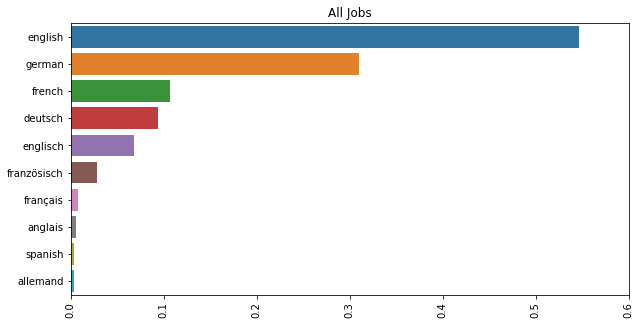

In [32]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('', fontsize=30)

ax0 = sns.barplot(x=[t[1] for t in all_job_lang_skills],y=[t[0] for t in all_job_lang_skills])
ax0.set_title("All Jobs")
ax0 = plt.xticks(rotation=90)
ax0 = plt.xlim(0, 0.6)

## Figure 8: Technical skills

In [33]:
hard_skills = ['python', 'r', 'java', 'javascript', 'sql', 'spss', 'sas', 'matlab', 'excel', 'tableau', 'hadoop', 'spark',
          'machine learning', 'deep learning', 'big data', 'neural networks']

all_job_hard_skills = skill_count_list(all_jobs_clean, hard_skills)
ds_job_hard_skills = skill_count_list(jobs_ds_clean, hard_skills)
da_job_hard_skills = skill_count_list(jobs_da_clean, hard_skills)
dp_job_hard_skills = skill_count_list(jobs_dp_clean, hard_skills)

In [34]:
all_job_hard_skills

[('python', 0.5),
 ('sql', 0.28463855421686746),
 ('machine learning', 0.2635542168674699),
 ('r', 0.23493975903614459),
 ('java', 0.17771084337349397),
 ('big data', 0.1355421686746988),
 ('excel', 0.10843373493975904),
 ('hadoop', 0.0858433734939759),
 ('spark', 0.0858433734939759),
 ('tableau', 0.07981927710843373),
 ('matlab', 0.07530120481927711),
 ('sas', 0.058734939759036146),
 ('javascript', 0.0572289156626506),
 ('deep learning', 0.05120481927710843),
 ('neural networks', 0.01957831325301205),
 ('spss', 0.016566265060240965)]

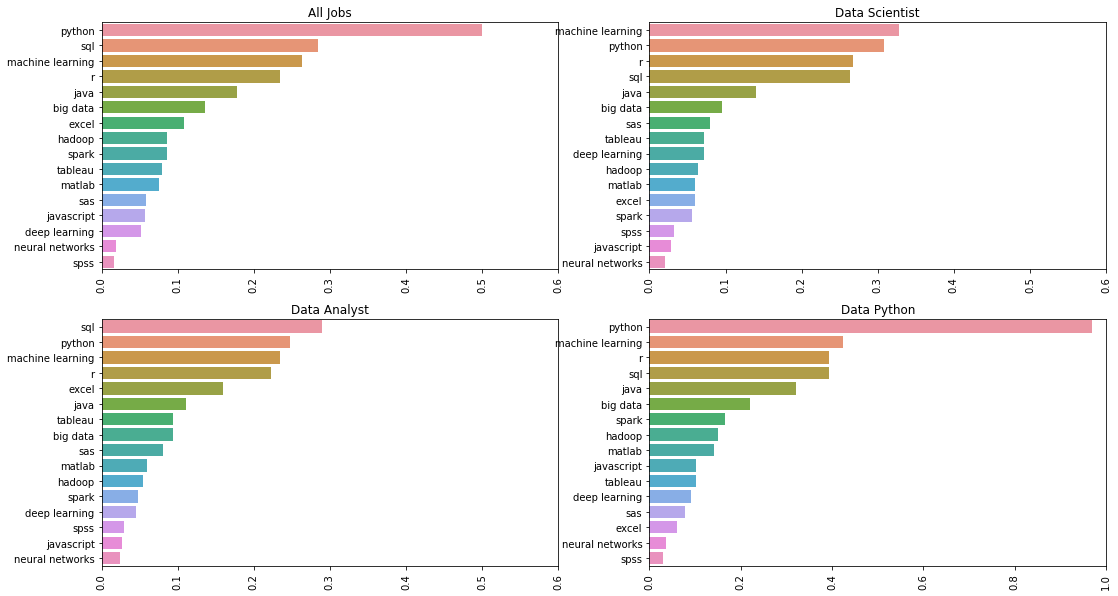

In [35]:
fig = plt.figure(figsize=(18, 10))
fig.suptitle('', fontsize=30)

ax0 = fig.add_subplot(2,2,1)
ax0 = sns.barplot(# for each (skill, count) tuple, construct a list of count (second element)
                  x=[t[1] for t in all_job_hard_skills], 
                  # for each (skill, count) tuple, construct a list of skill (first element)
                  y=[t[0] for t in all_job_hard_skills])  
ax0.set_title("All Jobs")
ax0 = plt.xticks(rotation=90)
ax0 = plt.xlim(0, 0.6)

ax1 = fig.add_subplot(2,2,2)
ax1 = sns.barplot(x=[t[1] for t in ds_job_hard_skills],y=[t[0] for t in ds_job_hard_skills])
ax1.set_title("Data Scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.xlim(0, 0.6)

ax2 = fig.add_subplot(2,2,3)
ax2 = sns.barplot(x=[t[1] for t in da_job_hard_skills],y=[t[0] for t in da_job_hard_skills])
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.xlim(0, 0.6)

ax3 = fig.add_subplot(2,2,4)
ax3 = sns.barplot(x=[t[1] for t in dp_job_hard_skills],y=[t[0] for t in dp_job_hard_skills])
ax3.set_title("Data Python")
ax3 = plt.xticks(rotation=90)
ax3 = plt.xlim(0, 1)

## Figure 9: Soft skills

In [36]:
soft_skills = ['curiosity', 'curious','presentation','attention to details','analytical',
               'quick learner','senior management','experienced', 'team player','work experience',
               'problem solving', 'interpersonal skills', 'communication', 'communicator','verbal',
               'sector', 'domain', 'proactive', 'junior', 'senior','project management']
               
all_job_soft_skills = skill_count_list(all_jobs_clean, soft_skills)
ds_job_soft_skills = skill_count_list(jobs_ds_clean, soft_skills)
da_job_soft_skills = skill_count_list(jobs_da_clean, soft_skills)
dp_job_soft_skills = skill_count_list(jobs_dp_clean, soft_skills)

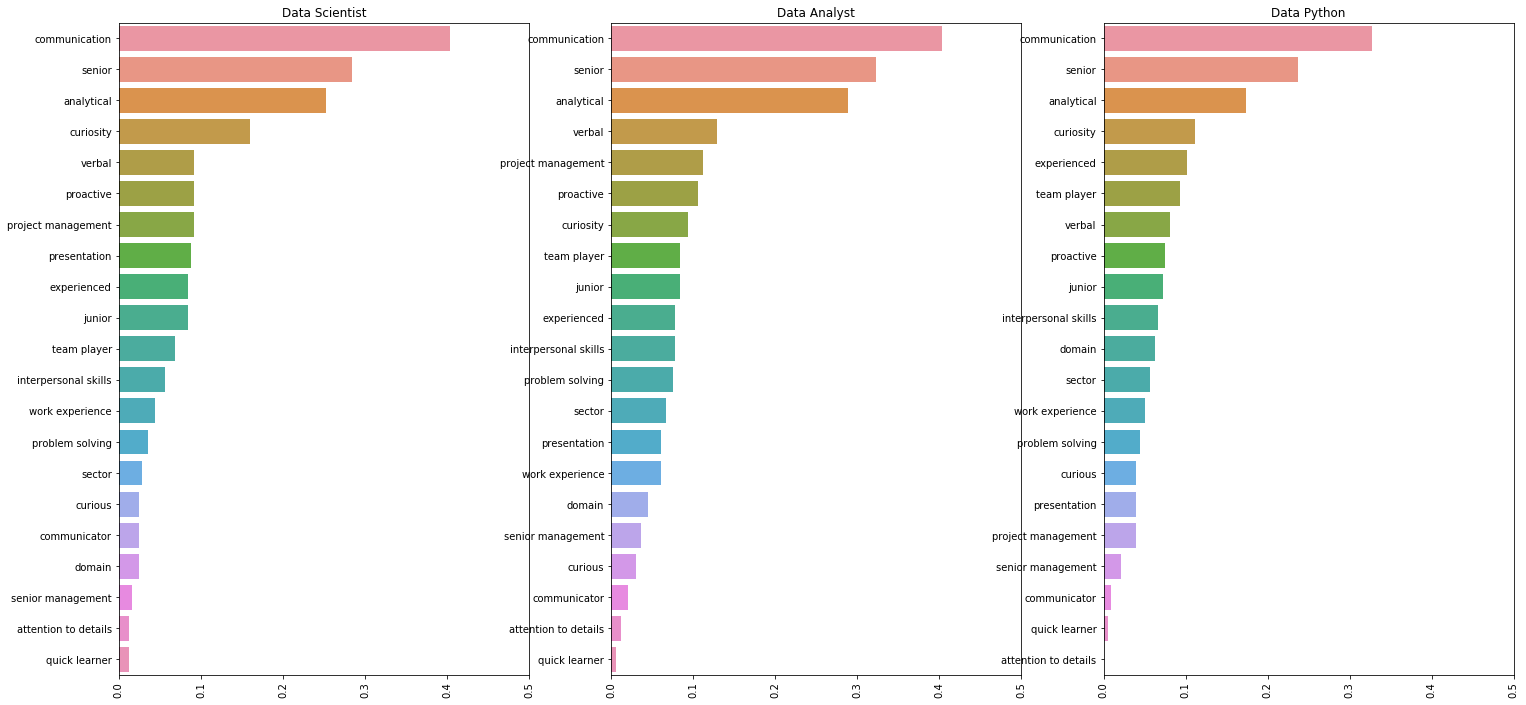

In [37]:
fig = plt.figure(figsize=(25, 12))
fig.suptitle('', fontsize=30)

# ax0 = fig.add_subplot(2,2,1)
# ax0 = sns.barplot(x=[t[1] for t in all_job_soft_skills], y= [t[0] for t in all_job_soft_skills])
# ax0.set_title("All Jobs")
# ax0 = plt.xticks(rotation=90)
# ax0 = plt.xlim(0, 400)

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.barplot(x=[t[1] for t in ds_job_soft_skills], y= [t[0] for t in ds_job_soft_skills])
ax1.set_title("Data Scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.xlim(0, 0.5)

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.barplot(x=[t[1] for t in da_job_soft_skills], y= [t[0] for t in da_job_soft_skills])
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.xlim(0, 0.5)

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.barplot(x=[t[1] for t in dp_job_soft_skills], y= [t[0] for t in dp_job_soft_skills])
ax3.set_title("Data Python")
ax3 = plt.xticks(rotation=90)
ax3 = plt.xlim(0, 0.5)

## Figure 10: Diplomas

In [38]:
diplomas = ['bsc', 'msc', 'phd']
               
all_job_dipl = skill_count_list(all_jobs_clean, diplomas)
ds_job_dipl = skill_count_list(jobs_ds_clean, diplomas)
da_job_dipl = skill_count_list(jobs_da_clean, diplomas)
dp_job_dipl = skill_count_list(jobs_dp_clean, diplomas)

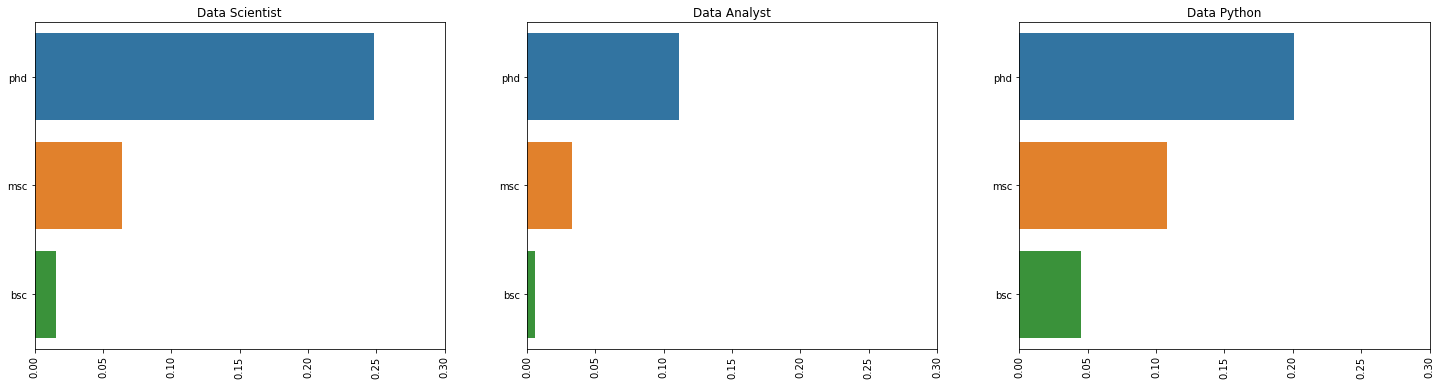

In [39]:
fig = plt.figure(figsize=(25, 6))
fig.suptitle('', fontsize=30)

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.barplot(x=[t[1] for t in ds_job_dipl], y= [t[0] for t in ds_job_dipl])
ax1.set_title("Data Scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.xlim(0, 0.3)

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.barplot(x=[t[1] for t in da_job_dipl], y= [t[0] for t in da_job_dipl])
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.xlim(0, 0.3)

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.barplot(x=[t[1] for t in dp_job_dipl], y= [t[0] for t in dp_job_dipl])
ax3.set_title("Data Python")
ax3 = plt.xticks(rotation=90)
ax3 = plt.xlim(0, 0.3)

## Figure 11: Industries

In [40]:
pharma = ['clinical', 'drug', 'bioanalytical', 'basel', 'medical', 'biomarkers', 'disease', 'pharmaceutical']
               
all_job_pharma = skill_count_list(all_jobs_clean, pharma)
ds_job_pharma = skill_count_list(jobs_ds_clean, pharma)
da_job_pharma = skill_count_list(jobs_da_clean, pharma)
dp_job_pharma = skill_count_list(jobs_dp_clean, pharma)

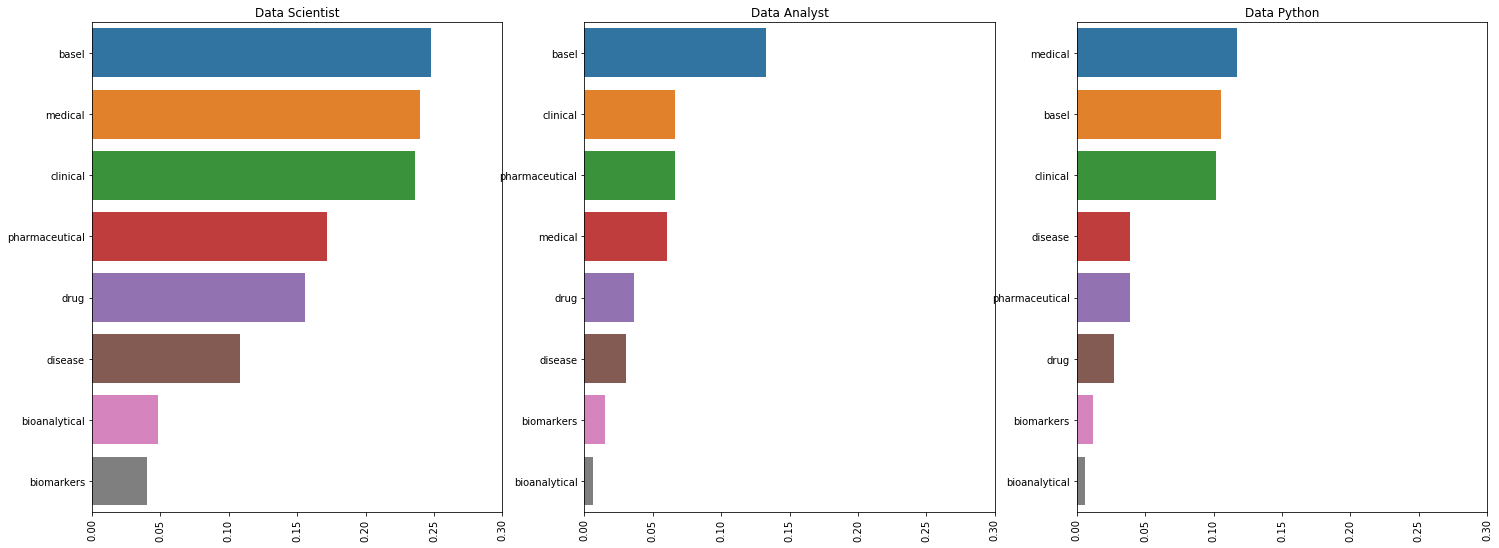

In [41]:
fig = plt.figure(figsize=(25, 9))
fig.suptitle('', fontsize=30)

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.barplot(x=[t[1] for t in ds_job_pharma], y= [t[0] for t in ds_job_pharma])
ax1.set_title("Data Scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.xlim(0, 0.3)

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.barplot(x=[t[1] for t in da_job_pharma], y= [t[0] for t in da_job_pharma])
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.xlim(0, 0.3)

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.barplot(x=[t[1] for t in dp_job_pharma], y= [t[0] for t in dp_job_pharma])
ax3.set_title("Data Python")
ax3 = plt.xticks(rotation=90)
ax3 = plt.xlim(0, 0.3)

In [42]:
business = ['business', 'microsoft', 'quality', 'reporting', 'managers', 'stakeholders', 'problem solver', 'kpis', 'manage', 'management', 'risk', 'operations']
it = ['computer', 'computer science', 'java', 'linux', 'c++', 'engineer', 'software development', 'software engineering']

## Figure 12: Soft skills animated

In [43]:
def count_skill(df, skill):
    skill_bool = df['description'].str.contains(r'\b' + skill + r'\b(?!-|&)', flags=re.IGNORECASE)
    skill_count = sum(skill_bool)
    skill_perc = float(skill_count)/len(df['description'])
    return skill_perc

# Returns a sorted list of (skill, skill count) tuples.
def skill_count_list(df, skills):
    dic_skills = []

    for skill in skills:
        skill_perc = count_skill(df, skill)
        dic_skills.append((skill, skill_perc))
            
    # Sort the list based on the second element of the tuples.
    return dic_skills

In [163]:
soft_skills = sorted(['curiosity', 'presentation', 'analytical' , 'project management', 'team player','work experience', 'problem solver', 
               'interpersonal', 'communication', 'stakeholder management', 'proactive', 'writing', 'creativity', 'leadership'])
               
all_job_soft_skills = skill_count_list(all_jobs_clean, soft_skills)
ds_job_soft_skills = skill_count_list(jobs_ds_clean, soft_skills)
da_job_soft_skills = skill_count_list(jobs_da_clean, soft_skills)
dp_job_soft_skills = skill_count_list(jobs_dp_clean, soft_skills)

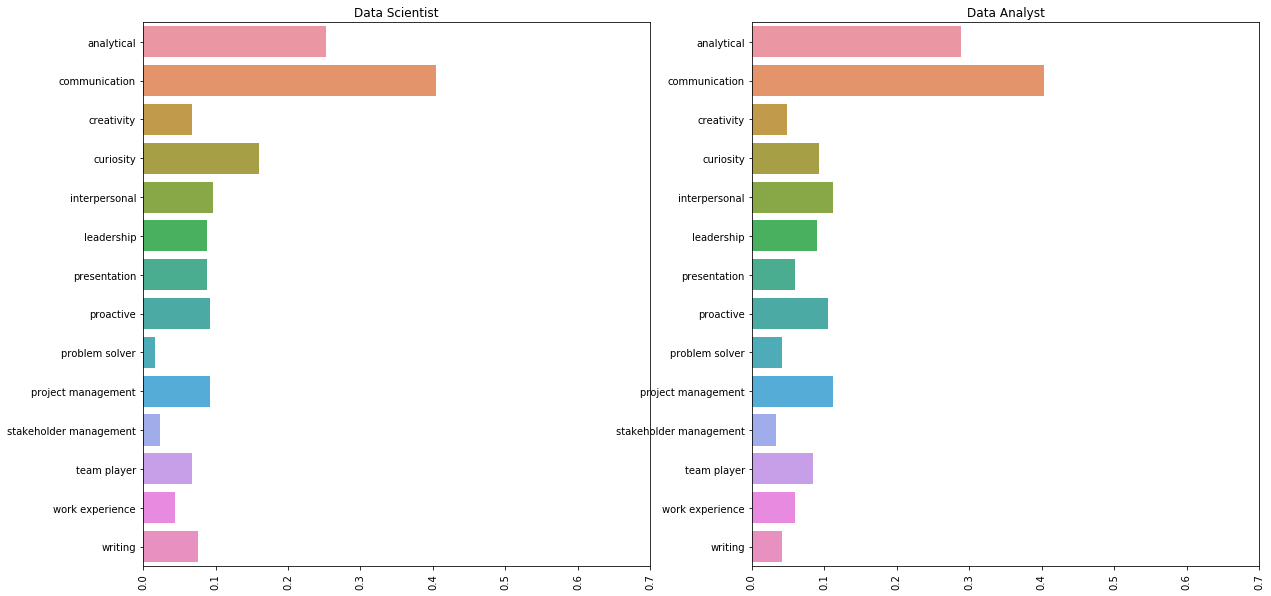

In [164]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle('', fontsize=30)

# ax0 = fig.add_subplot(2,2,1)
# ax0 = sns.barplot(x=[t[1] for t in all_job_soft_skills], y= [t[0] for t in all_job_soft_skills])
# ax0.set_title("All Jobs")
# ax0 = plt.xticks(rotation=90)
# ax0 = plt.xlim(0, 400)

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=[t[1] for t in ds_job_soft_skills], y= [t[0] for t in ds_job_soft_skills])
ax1.set_title("Data Scientist")
ax1 = plt.xticks(rotation=90)
ax1 = plt.xlim(0, 0.7)

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.barplot(x=[t[1] for t in da_job_soft_skills], y= [t[0] for t in da_job_soft_skills])
ax2.set_title("Data Analyst")
ax2 = plt.xticks(rotation=90)
ax2 = plt.xlim(0, 0.7)


In [165]:
ds_da_soft = [ds_job_soft_skills,da_job_soft_skills]

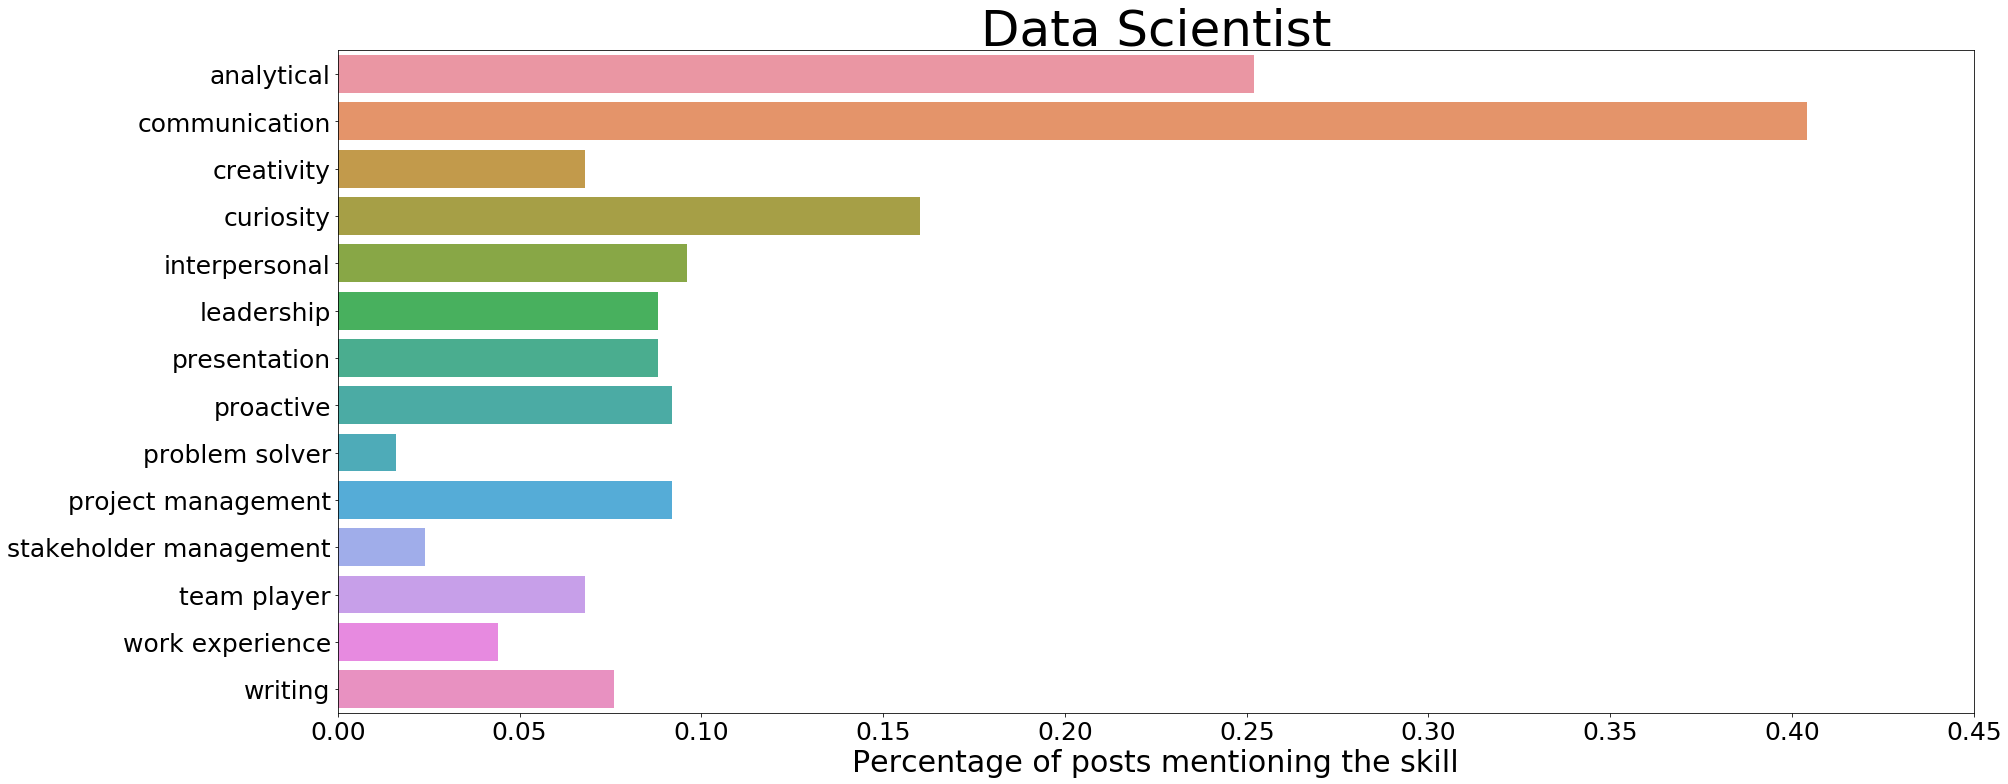

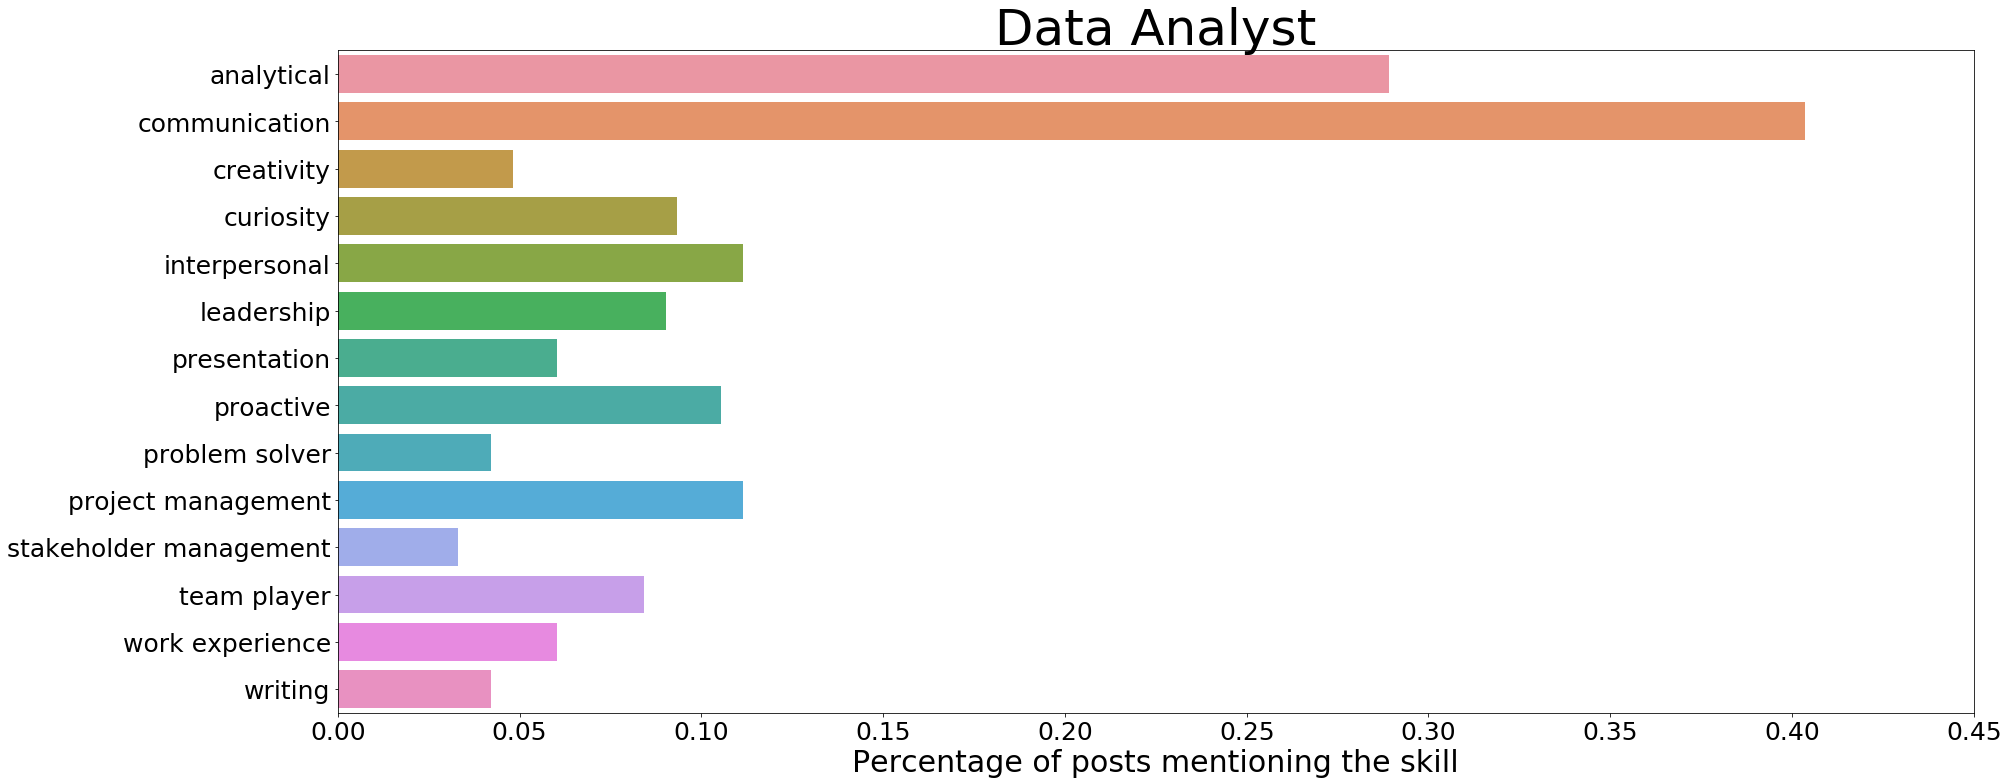

In [204]:
titles = ['Data Scientist', 'Data Analyst']
for i in range(2):
    fig = plt.figure(figsize=(28,11))
    plt.xlim(0, 0.45)
    plt.xlabel('Percentage of posts mentioning the skill',fontsize=30)
    plt.title(titles[i],fontsize=50)
    plt.tick_params(labelsize=30)
    fig = sns.barplot(x=[t[1] for t in ds_da_soft[i]], y= [t[0] for t in ds_da_soft[i]])
    plt.setp(fig.lines,linewidth=10)
    plt.tight_layout()
    chart = fig.get_figure()
    chart.savefig(fname=f'figure_s{i}.jpg', dpi=300)

## Figure 13: Programming skills animated

In [175]:
hard_skills = sorted(['python', 'r', 'sql', 'matlab', 'excel', 'tableau', 'hadoop', 'spark',
               'machine learning', 'deep learning', 'big data', 'neural networks', 'git',
               'natural language processing'])

all_job_hard_skills = skill_count_list(all_jobs_clean, hard_skills)
ds_job_hard_skills = skill_count_list(jobs_ds_clean, hard_skills)
da_job_hard_skills = skill_count_list(jobs_da_clean, hard_skills)
dp_job_hard_skills = skill_count_list(jobs_dp_clean, hard_skills)

In [176]:
ds_da_hard = [ds_job_hard_skills,da_job_hard_skills]

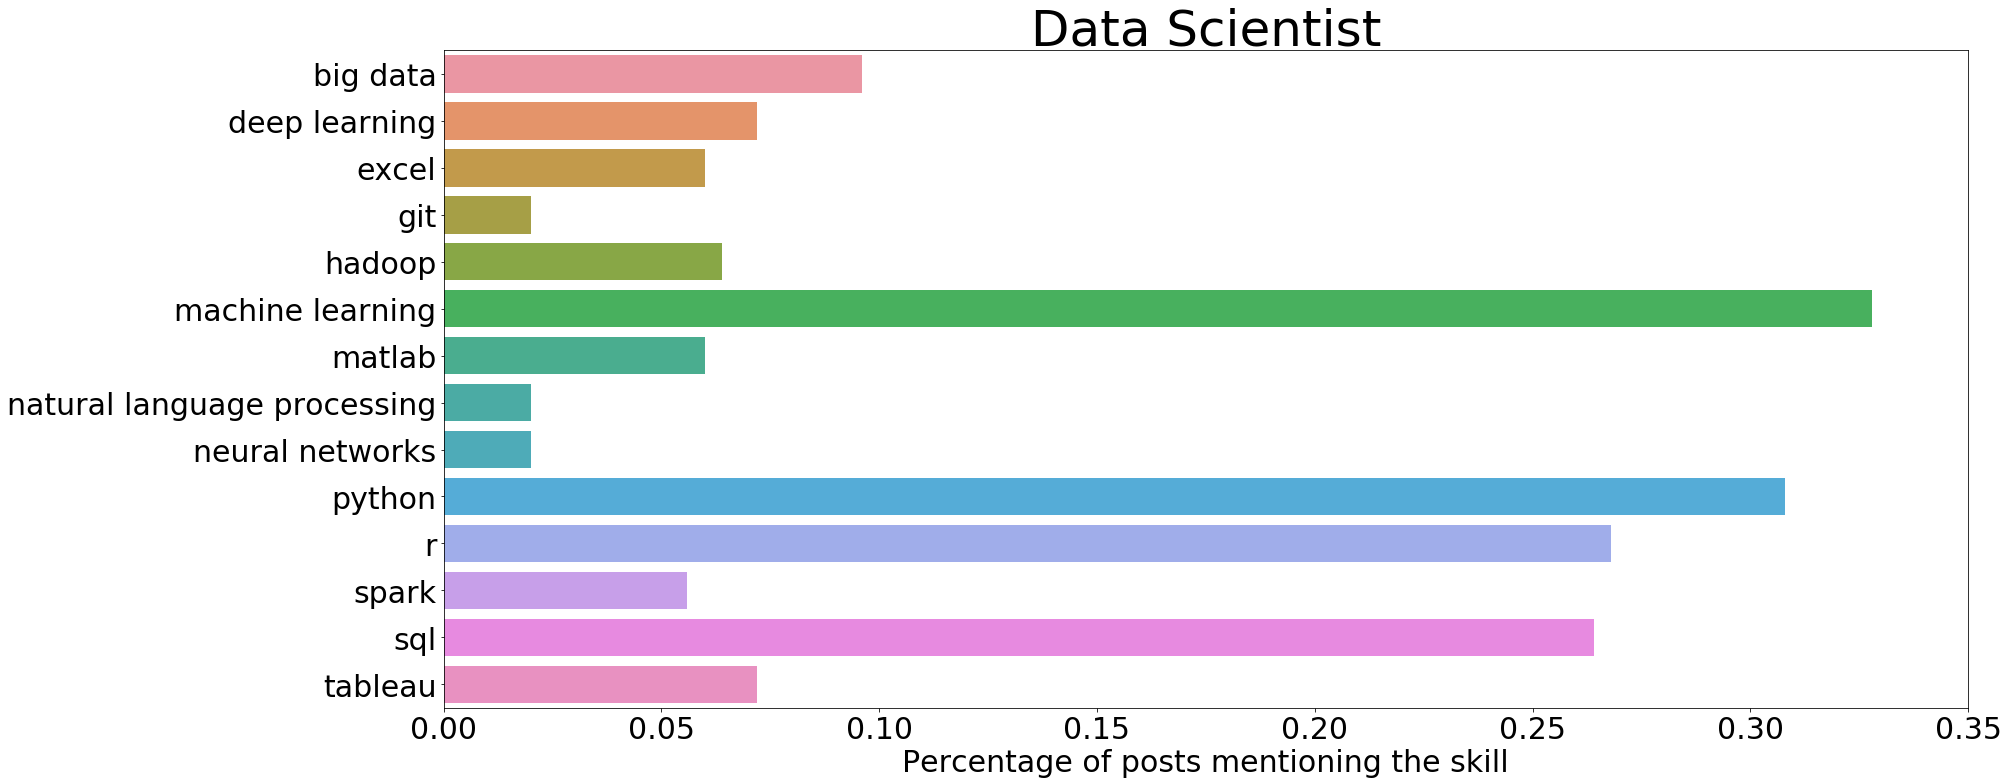

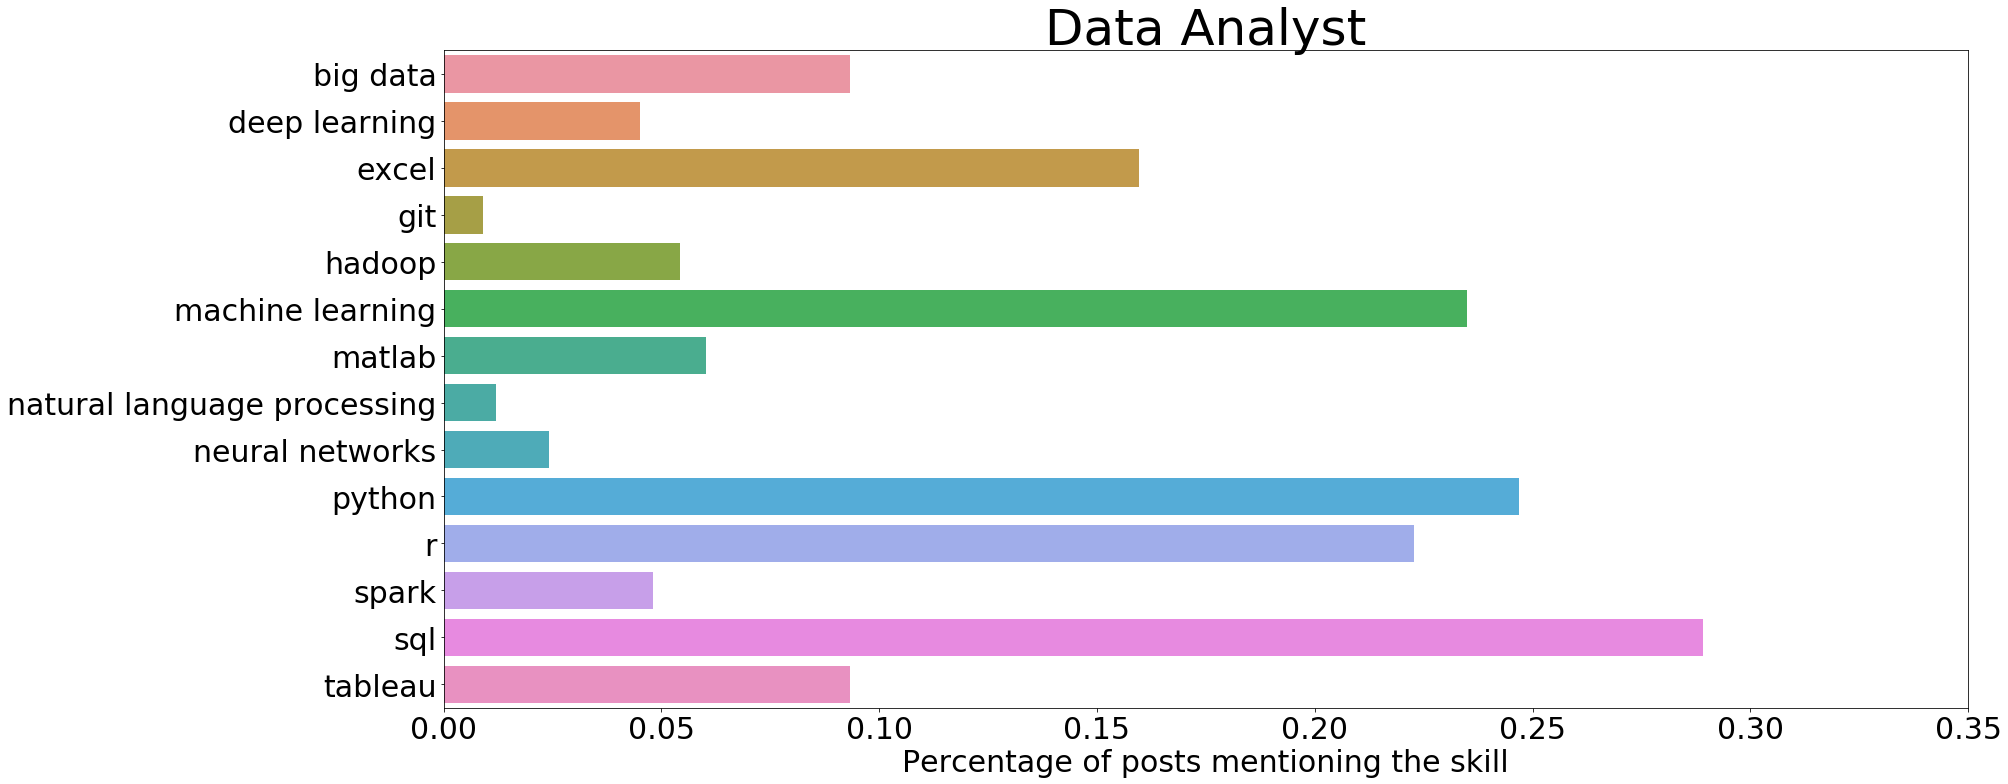

In [205]:
titles = ['Data Scientist', 'Data Analyst']
for i in range(2):
    fig = plt.figure(figsize=(28,11))
    plt.xlim(0, 0.35)
    plt.xlabel('Percentage of posts mentioning the skill',fontsize=30)
    plt.title(titles[i],fontsize=50)
    plt.tick_params(labelsize=30)
    fig = sns.barplot(x=[t[1] for t in ds_da_hard[i]], y= [t[0] for t in ds_da_hard[i]])
    plt.setp(fig.lines,linewidth=10)
    plt.tight_layout()
    chart = fig.get_figure()
    chart.savefig(fname=f'figure_h{i}.jpg', dpi=300)